<a href="https://colab.research.google.com/github/jacobrgardner/CIS5200_Fall2023/blob/main/homework0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIS 5200: Machine Learning
## Homework 0

In [1]:
import os
import sys

# For autograder only, do not modify this cell.
# True for Google Colab, False for autograder
NOTEBOOK = (os.getenv('IS_AUTOGRADER') is None)
if NOTEBOOK:
    print("[INFO, OK] Google Colab.")
else:
    print("[INFO, OK] Autograder.")
    sys.exit()

[INFO, OK] Google Colab.


### Penngrader setup

In [2]:
# %%capture
!pip install penngrader-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 3.3 MB/s eta 0:00:00


In [3]:
%%writefile config.yaml
grader_api_url: 'https://23whrwph9h.execute-api.us-east-1.amazonaws.com/default/Grader23'
grader_api_key: 'flfkE736fA6Z8GxMDJe2q8Kfk8UDqjsG3GVqOFOa'

Writing config.yaml


In [4]:
from penngrader.grader import PennGrader

# PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO
# TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 99999999 # YOUR PENN-ID GOES HERE AS AN INTEGER #
SECRET = STUDENT_ID

grader = PennGrader('config.yaml', 'CIS5200_FALL_2023_HW0', STUDENT_ID, SECRET)

PennGrader initialized with Student ID: 99999999

Make sure this correct or we will not be able to store your grade


# PyTorch

Programming assignments will be primarily done in PyTorch. If you've used NumPy before, then you'll find that PyTorch has many of the same functionalities plus more.

The base object in PyTorch is the Tensor. See this tutorial for a brief primer on the syntax: https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html

In [5]:
import torch

A = torch.randn(5,6)
print(A)

tensor([[-2.0145, -0.0689, -0.1723, -0.3607, -0.3388,  1.9689],
        [-0.3043, -1.6953, -0.8964, -0.4316,  0.6652, -0.9887],
        [-0.5316, -0.2501,  1.0515,  1.1782,  0.3042, -1.4558],
        [-1.4491,  0.6909,  0.0335, -0.9160, -0.6052, -0.4167],
        [ 1.4132,  0.1248,  0.3737,  0.0046,  0.4854,  2.4077]])



Nearly all low-level functions are already implemented in PyTorch. *Check the documentation before implementing anything yourself*: https://pytorch.org/docs/stable/index.html

Many functions are built-in to the `torch.Tensor` object. For example, instead of calling `torch.sum(X)`, you can call `X.sum()` directly. Some of these functions such as `matmul`, `mm`, or `dot` will be useful for implementing matrix operations. A full list of tensor operations can be found here: https://pytorch.org/docs/stable/tensors.html

In [6]:
A = torch.randn(5,6)
B = torch.randn(6,2)
print(A.mm(B))

tensor([[-1.5871, -1.1885],
        [ 1.8405,  3.0442],
        [-0.9233, -2.3761],
        [-2.7653, -1.4249],
        [ 0.8071,  1.0799]])


PyTorch has a fairly extensive distributions library, which allows you to generate samples, compute probabilities, and other statistical quantities. In this example we can construct a Bernoulli random variable with parameter $p=0.8$ and calculate the log probability of the following observations `[1,0,0,1,1]`.

In [7]:
from torch.distributions.bernoulli import Bernoulli

X = Bernoulli(0.8)
print(X.log_prob(torch.Tensor([1,0,0,1,1])))

tensor([-0.2231, -1.6094, -1.6094, -0.2231, -0.2231])


# Matrix operations
Let $X\in \mathbb R^{m\times n}$ be a data matrix of $m$ samples with $n$ features. Implement the batched sample gradient, $\nabla_X f(X)$, for each of the calculus problems from the written homework. The batched sample gradient is the $m\times n$ matrix where the $i$th row is the gradient of $f$ with respect to the $i$th sample.

Do so using matrix operations without any for loops. As an example, the first one has been done for you.

Some variables other than $X$ can also be batched, such as sample labels $Y \in \mathbb R^{m}$. For such functions, the $i$th sample gradient of these examples is taken with respect to the sample $x_i$ using the sample label $y_i$: $\nabla_{x_i} f(x_i,y_i)$.


1. $f(x_i;w) = w^\top x_i$
2. $f(x_i) = x_i^\top x_i$
3. $f(x_i,y_i;w) = (y_i-w^\top x_i)^2$
4. $f(x_i,y_i;w) = \log(1 + \exp(-y_iw^\top x_i))$
5. $f(x_i;A) = x_i^\top Ax_i$

In [8]:
import torch

def grad1(X, w):
    # X := Tensor of size (m,n)
    # w := Tensor of size (n,)
    # Return := Tensor of size (m,n)
    m = X.size(0) # number of rows
    return w.repeat(m,1)
    # return torch.zeros(X.size())
    # return X.zero_()

def grad2(X):
    # X := Tensor of size (m,n)
    # Return := Tensor of size (m,n)
    return 2*X

def grad3(X, y, w):
    # X := Tensor of size (m,n)
    # y := Tensor of size (m,)
    # w := Tensor of size (n,)
    # Return := Tensor of size (m,n)
    m = X.size(0)
    W = w.repeat(m,1)
    #return -2@(y@w.T()).T() + 2*(X@w@w.T())
    return -2 * (y - X.matmul(w).squeeze()).view(-1, 1) * w.repeat(X.shape[0], 1)

def grad4(X, y, w):
    # X := Tensor of size (m,n)
    # y := Tensor of size (m,)
    # w := Tensor of size (n,)
    # Return := Tensor of size (m,n)
    z = -y * X.matmul(w).squeeze()
    exp_z = torch.exp(z)
    factor = (-y * exp_z / (1 + exp_z)).view(-1, 1)
    return factor * w.repeat(X.shape[0], 1)
def grad5(X, A):
    # X := Tensor of size (m,n)
    # A := Tensor of size (n, n)
    # Return := Tensor of size (m,n)
    return X.matmul(A + A.t())

In [9]:
for i in range(1,6):
    grader.grade(test_case_id = f'grad{i}_test', answer = locals()[f'grad{i}'])

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.
Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.
Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.
Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.
Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# Dataset statistics

Let $X\in \mathbb R^{m\times n}$ be a data matrix of $m$ samples with dimension
$n$. Implement the following functions to calculate dataset statistics:

1. Calculate the mean of each feature using the unbiased sample mean
2. Calculate the variance of each feature using the unbiased sample variance
3. Normalize the data matrix to have zero mean and unit variance along each feature.

In [10]:
def stat1(X):
    # Calculate the unbiased sample mean for each feature of the data matrix X.
    # The ith entry in the returned tensor should have the sample mean of the
    # ith feature.
    # X := Tensor of size (m,n)
    # Return := Tensor of size (n,)
    col_mean = torch.mean(X, dim = 0)
    return col_mean


def stat2(X):
    # Calculate the unbiased sample variance for each feature of the data
    # matrix X. The ith entry in the returned tensor should have the unbiased
    # sample variance of the ith feature
    # X := Tensor of size (m,n)
    # Return := Tensor of size (n,)
    col_var = torch.var(X, dim = 0)
    return col_var

def stat3(X):
    # Normalize the data matrix X. The ijth entry in the returned tensor should
    # have the normalized entry of X[i,j].
    return (X-stat1(X))/stat2(X).sqrt()

In [11]:
for i in range(1,4):
    grader.grade(test_case_id = f'stat{i}_test', answer = locals()[f'stat{i}'])

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.
Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.
Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# Sampling and plotting

Draw samples from a 2D multivariate Gaussian with mean $\mu=[-1,2]$ and covariance matrix $\Sigma=\left[\begin{array}{cc} 1 & 2 \\ 2 & 5\end{array}\right]$.

Then, plot this data using matplotlib. The plotting is not autograded, but you can compare your result with the image at the end of this notebook.

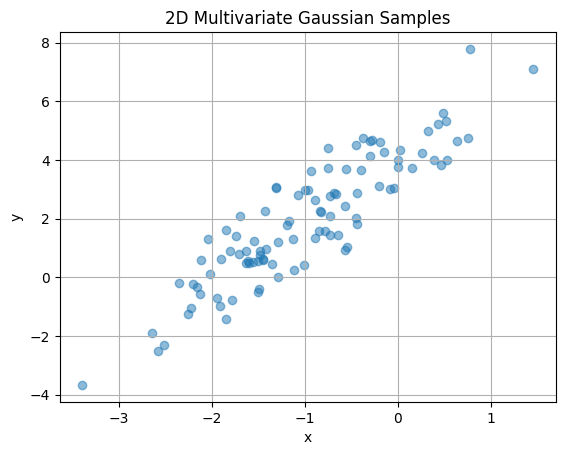

In [12]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

def sample(n):
    # Draw samples from a 2D Gaussian with the given parameters. The ith row of
    # the output should have a drawn sample.
    # Return := Tensor of size (n,2)
    sample_mean = torch.tensor([-1.0, 2.0])
    sample_covar_mat = torch.tensor([[1.0, 2.0], [2.0, 5.0]])
    dist = torch.distributions.MultivariateNormal(sample_mean, sample_covar_mat)
    samples = dist.sample((n,))
    return samples

def plot(X):
    # Plot data from the given matrix. Each row in X is a data point with 2
    # features to be plotted.
    # X := Tensor of size (m,2)
    plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
    plt.title("2D Multivariate Gaussian Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

# Test the functions
n = 100
X = sample(n)
plot(X)

In [13]:
grader.grade(test_case_id = 'sample_test', answer = sample)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Plotting the data sampled from the previous problem should show something like this:

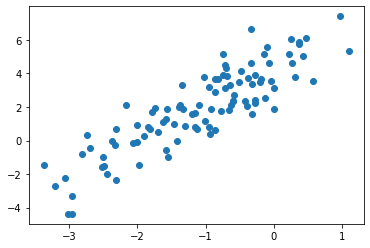

# Submitting to Gradescope
Before submitting to Gradescope, make sure that selecting "Runtime" -> "Restart and run all" completes all cells without errors.

1. Go to the File menu and choose "Download .ipynb" and also "Download .py". Make sure these files are named homework0.ipynb and homework0.py, respectively
2. Go to GradeScope through the canvas page and ensure your class is "BAN_CIS-5200-001 202330"
3. Select Homework 0
4. Upload both files
5. PLEASE CHECK THE AUTOGRADER OUTPUT TO ENSURE YOUR SUBMISSION IS PROCESSED CORRECTLY!
You should be set! This assignment is autograded to give you feedback, but is not worth any points. However, completion of this assignment is required to pass the course.